In [3]:
# %load ~/ipyhead
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns

## What do selected vs unselected genes look like in terms of their expressions across samples in a cell type, across all samples in all cell types (sort), across average expression in all cell types?

Are we going to see that unselected genes are fairly uniform and meaningless? Are they all low expression throughout? Are these methods selecting very high expression genes only?

"Selected" could mean the ones Cibersort includes in expression profiles, or ones flagged by Bindea (probably better)

## Among samples of one cell type: how much variation is there in genes of interest? Is variance motivated?

For selected genes for a certain cell type: how much variance in expression is there within this cell type for these gene?

Is it worth putting variance into our model?

In [4]:
df = pd.read_csv('all_expressions.tsv', sep='\t')

In [6]:
del df['Unnamed: 0']

In [138]:
del df['ACCNUM']

In [143]:
del df['Relabel']
del df['DESC']

In [144]:
df.head()

,geneid,probeid,PRB12534.Jurkat,PRB12535.Jurkat,PRB12536.Jurkat,PRB12537.IM.9,PRB12538.IM.9,PRB12539.IM.9,PRB12540.Raji,PRB12541.Raji,...,TEM_U133A_1 [TFH_E-MEXP-750|TEM_U133A_1],TEM_U133A_2 [TFH_E-MEXP-750|TEM_U133A_2],TEM_U133A_3 [TFH_E-MEXP-750|TEM_U133A_3],TN_U133A_1 [TFH_E-MEXP-750|TN_U133A_1],TN_U133A_2 [TFH_E-MEXP-750|TN_U133A_2],TN_U133A_3 [TFH_E-MEXP-750|TN_U133A_3],TH_1 [TREGs_GSE4527|GSM101518],Treg_1 [TREGs_GSE4527|GSM101519],TH_2 [TREGs_GSE4527|GSM101520],Treg_2 [TREGs_GSE4527|GSM101521]
0,RFC2,1053_at,2104.464,1913.695,1974.465,2428.428,2232.343,2470.156,831.009,713.614,...,278.508206,315.680926,325.445350,227.014010,298.255643,246.440867,317.871923,182.444126,481.930051,125.805188
1,RFC2,203696_s_at,2858.885,3889.223,2887.030,4171.271,4308.615,3523.738,1085.860,1109.435,...,278.508206,315.680926,325.445350,227.014010,298.255643,246.440867,317.871923,182.444126,481.930051,125.805188
2,HSPA6,117_at,189.528,110.972,160.200,432.932,261.238,280.899,184.187,178.548,...,12.987326,74.128591,141.683528,145.506877,21.656093,77.518896,82.051115,703.693696,194.230338,97.987345
3,HSPA6,213418_at,76.702,85.718,168.155,706.366,463.835,427.057,27.579,119.920,...,12.987326,74.128591,141.683528,145.506877,21.656093,77.518896,82.051115,703.693696,194.230338,97.987345
4,PAX8,121_at,1753.889,1291.766,1885.517,1561.437,1534.517,1540.394,1666.894,1625.360,...,26.766424,117.425553,58.012974,31.797787,102.044136,99.058819,147.641189,135.526908,38.741434,157.813189


In [145]:
df[df.columns[2:]].head().columns.tolist()

['PRB12534.Jurkat',
 'PRB12535.Jurkat',
 'PRB12536.Jurkat',
 'PRB12537.IM.9',
 'PRB12538.IM.9',
 'PRB12539.IM.9',
 'PRB12540.Raji',
 'PRB12541.Raji',
 'PRB12542.Raji',
 'PRB12543.THP.1',
 'PRB12544.THP.1',
 'PRB12545.THP.1',
 'GSM155229.CEL.gz',
 'GSM155232.CEL.gz',
 'GSM155234.CEL.gz',
 'GSM155236.CEL.gz',
 'GSM155238.CEL.gz',
 'GSM21712.CEL.gz',
 'GSM21713.CEL.gz',
 'GSM21714.CEL.gz',
 'A_LW_DC48hLPS_HC_U133A.CEL',
 'A_LW_DC48hLPS_U133A_200503.CEL',
 'A_LW_DC6hLPS_HC_U133A.CEL',
 'A_LW_DC6hLPS_U133A_200503.CEL',
 'A_LW_imDC_U133A_200503.CEL',
 'A_LW_macro_LPS_HC_U133A.CEL',
 'A_LW_macro_LPS_U133A_130503.CEL',
 'A_LW_macroctrl_U133A_130503.CEL',
 'A_LW_mastcellctrl_U133A.CEL',
 'A_LW_mastcellIgE_U133A.CEL',
 'A_LW_neutrophil_U133A.CEL',
 'A_MF_2hrEosinophils.CEL',
 'A_MF_CCR7._U133A_190202.CEL',
 'A_MF_CCR7._U133A_190202.CEL.1',
 'A_MF_ControlEosinophil.CEL',
 'A_MF_ControlMASTCELL_U133A.CEL',
 'A_MF_IgEMASTCELL_U133A.CEL',
 'A_MF_neutrophils_U133A.CEL',
 'A_MF_TH1human_U133A_290502.C

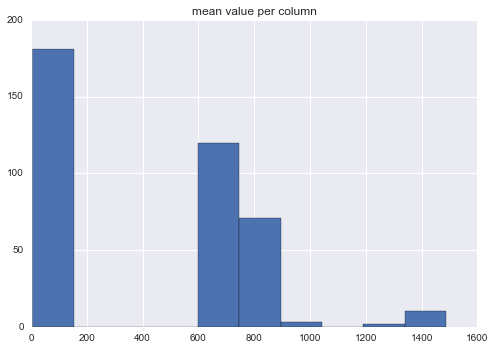

In [147]:
# are columns normalized?
df[df.columns[2:]].apply(lambda x: x.mean(), axis=0).hist()
plt.title('mean value per column')

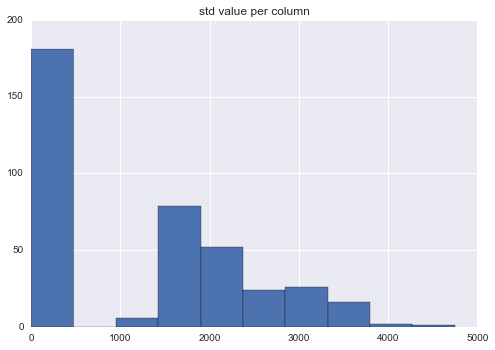

In [148]:
df[df.columns[2:]].apply(lambda x: x.std(), axis=0).hist()
plt.title('std value per column')

In [149]:
meanvals = df[df.columns[2:]].apply(lambda x: x.mean(), axis=0)
meanvals.head()

PRB12534.Jurkat    1294.401286
PRB12535.Jurkat    1313.090414
PRB12536.Jurkat    1344.007331
PRB12537.IM.9      1369.016079
PRB12538.IM.9      1388.609107
dtype: float64

In [150]:
meanvals.sort()

/home/maxim/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting
  if __name__ == '__main__':


In [158]:
meanvals[meanvals > 8]

CD4Tcell-Th1-restimulated12hour-1 [HG-U133A] [IRIS_GSE22886|GSM565276]      643.079902
A_TS_TC_Th1_U133A_141003 [Chtanova_immune|A_TS_TC_Th1_U133A_141003]         655.558908
Bcell-naive-3 [HG-U133A] [IRIS_GSE22886|GSM565310]                          659.769247
NKcell-IL15stimulated-1 [HG-U133A] [IRIS_GSE22886|GSM565302]                661.455178
CD4Tcell-Th2-restimulated48hour-2 [HG-U133A] [IRIS_GSE22886|GSM565285]      661.543820
DendriticCell-Control-5 [HG-U133A] [IRIS_GSE22886|GSM565370]                668.440631
MemoryTcell-RO-activated-1 [HG-U133A] [IRIS_GSE22886|GSM565290]             668.721397
Bcell-naive-1 [HG-U133A] [IRIS_GSE22886|GSM565308]                          669.947735
MemoryTcell-RO-activated-2 [HG-U133A] [IRIS_GSE22886|GSM565291]             671.585993
Monocyte-Day7-11 [HG-U133A] [IRIS_GSE22886|GSM565364]                       671.884865
Bcell-naive-4 [HG-U133A] [IRIS_GSE22886|GSM565311]                          671.961806
NKcell-IL2stimulated-1 [HG-U133A] [IRIS_GSE

looks like several datasets might not be lognormalized

* we ran RMA ourselves on Bindea and IRIS (see `process.R` in those directories)
* abbas, cibersort we took as is

matches this:


In [159]:
# all from this dataset are high
meanvals[meanvals.index.str.contains('Chtanova')]

A_TS_TC_Th1_U133A_141003 [Chtanova_immune|A_TS_TC_Th1_U133A_141003]          655.558908
A_LW_DC48hLPS_U133A_200503 [Chtanova_immune|A_LW_DC48hLPS_U133A_200503]      674.052694
A_TS_TC_Th2_U133A_141003 [Chtanova_immune|A_TS_TC_Th2_U133A_141003]          674.505982
A_TS_RN_gdTcells_U133A [Chtanova_immune|A_TS_RN_gdTcells_U133A]              677.259176
A_LW_DC48hLPS_HC_U133A [Chtanova_immune|A_LW_DC48hLPS_HC_U133A]              677.461544
A_LW_imDC_U133A_200503 [Chtanova_immune|A_LW_imDC_U133A_200503]              685.552698
A_SZ_mac2cont_U133A_240603 [Chtanova_immune|A_SZ_mac2cont_U133A_240603]      688.127877
A_LW_-BAFF_U133A_70303 [Chtanova_immune|A_LW_-BAFF_U133A_70303]              691.869523
A_MF_IgEMASTCELL_U133A [Chtanova_immune|A_MF_IgEMASTCELL_U133A]              692.751444
A_LW_macroctrl_U133A_130503 [Chtanova_immune|A_LW_macroctrl_U133A_130503]    696.958173
A_LW_+BAFF_U133A_70303 [Chtanova_immune|A_LW_+BAFF_U133A_70303]              698.460943
A_TS_RN_gdTcellsREP_A [Chtanova_

In [160]:
# all from this dataset are high
meanvals[meanvals.index.str.contains('IRIS')]

CD4Tcell-Th1-restimulated12hour-1 [HG-U133A] [IRIS_GSE22886|GSM565276]    643.079902
Bcell-naive-3 [HG-U133A] [IRIS_GSE22886|GSM565310]                        659.769247
NKcell-IL15stimulated-1 [HG-U133A] [IRIS_GSE22886|GSM565302]              661.455178
CD4Tcell-Th2-restimulated48hour-2 [HG-U133A] [IRIS_GSE22886|GSM565285]    661.543820
DendriticCell-Control-5 [HG-U133A] [IRIS_GSE22886|GSM565370]              668.440631
MemoryTcell-RO-activated-1 [HG-U133A] [IRIS_GSE22886|GSM565290]           668.721397
Bcell-naive-1 [HG-U133A] [IRIS_GSE22886|GSM565308]                        669.947735
MemoryTcell-RO-activated-2 [HG-U133A] [IRIS_GSE22886|GSM565291]           671.585993
Monocyte-Day7-11 [HG-U133A] [IRIS_GSE22886|GSM565364]                     671.884865
Bcell-naive-4 [HG-U133A] [IRIS_GSE22886|GSM565311]                        671.961806
NKcell-IL2stimulated-1 [HG-U133A] [IRIS_GSE22886|GSM565297]               673.503396
DendriticCell-Control-2 [HG-U133A] [IRIS_GSE22886|GSM565367]     

In [8]:
bindea = pd.read_csv('bindea_by_category.csv')
bindea.head()

,B cells,Blood vessels,CD8 T cells,Cytotoxic cells,DC,Eosinophils,Lymph vessels,Macrophages,Mast cells,NK CD56bright cells,...,TReg,Tcm,Tem,Tgd,Th1 cells,Th17 cells,Th2 cells,aDC,iDC,pDC
0,207819_s_at,204677_at,218405_at,209870_s_at,206407_s_at,205566_at,206742_at,203381_s_at,203196_at,215908_at,...,221333_at,203747_at,212609_s_at,205103_at,213419_at,208402_at,213245_at,207533_at,209735_at,206148_at
1,221234_s_at,NaN,217729_s_at,221087_s_at,207900_at,49452_at,204879_at,218673_s_at,206281_at,215409_at,...,221334_s_at,216197_at,210109_at,207840_at,40148_at,216876_s_at,220841_s_at,219424_at,202201_at,NaN
2,219497_s_at,NaN,209871_s_at,214450_at,207861_at,43427_at,209946_at,214452_at,205428_s_at,204014_at,...,NaN,208442_s_at,206978_at,203562_at,201525_at,205707_at,220842_at,210029_at,220162_s_at,NaN
3,210347_s_at,NaN,219168_s_at,204794_at,207277_at,221928_at,NaN,214390_s_at,206676_at,204015_s_at,...,NaN,210858_x_at,207794_at,211144_x_at,212062_at,206419_at,221569_at,205569_at,210325_at,NaN
4,206255_at,NaN,64432_at,37145_at,205404_at,222195_s_at,NaN,208075_s_at,214533_at,205906_at,...,NaN,207686_s_at,208719_s_at,216920_s_at,201641_at,NaN,214373_at,218400_at,206749_at,NaN


In [31]:
# matching by probeid alone is bad -- look how few hits we get
print df[df['probeid'].isin(bindea['CD8 T cells'].dropna().unique())].shape

(36, 392)


In [12]:
# match by gene ids instead
# see extractHumanAnnotations.R
annotations = pd.read_csv('annot.tsv', sep='\t')
annotations = annotations.reset_index()
annotations.columns = ['probe', 'accession', 'symbol', 'desc']
annotations.head()

,probe,accession,symbol,desc
0,1007_s_at,U48705,NaN,NaN
1,1053_at,M87338,RFC2,"replication factor C (activator 1) 2, 40kDa"
2,117_at,X51757,HSPA6,heat shock 70kDa protein 6 (HSP70B')
3,121_at,X69699,PAX8,paired box 8
4,1255_g_at,L36861,GUCA1A,guanylate cyclase activator 1A (retina)


In [22]:
cd8_t = pd.DataFrame({'probe': bindea['CD8 T cells'].dropna().unique()})
print cd8_t.shape
cd8_t.head()


(40, 1)


,probe
0,218405_at
1,217729_s_at
2,209871_s_at
3,219168_s_at
4,64432_at


In [23]:
cd8_t = pd.merge(cd8_t, annotations, how='left', on='probe')
print cd8_t.shape
cd8_t.head()

(40, 4)


,probe,accession,symbol,desc
0,218405_at,NM_013375,ABT1,activator of basal transcription 1
1,217729_s_at,NM_001130,AES,amino-terminal enhancer of split
2,209871_s_at,AB014719,APBA2,"amyloid beta (A4) precursor protein-binding, f..."
3,219168_s_at,NM_017701,PRR5,proline rich 5 (renal)
4,64432_at,W05463,MAPKAPK5-AS1,MAPKAPK5 antisense RNA 1


In [32]:
matching = df[df['geneid'].isin(cd8_t.symbol.dropna().unique())].copy()
print matching.shape
del matching['probeid']
matching = matching.set_index('geneid')
matching.head()

(58, 392)


,PRB12534.Jurkat,PRB12535.Jurkat,PRB12536.Jurkat,PRB12537.IM.9,PRB12538.IM.9,PRB12539.IM.9,PRB12540.Raji,PRB12541.Raji,PRB12542.Raji,PRB12543.THP.1,...,TEM_U133A_1 [TFH_E-MEXP-750|TEM_U133A_1],TEM_U133A_2 [TFH_E-MEXP-750|TEM_U133A_2],TEM_U133A_3 [TFH_E-MEXP-750|TEM_U133A_3],TN_U133A_1 [TFH_E-MEXP-750|TN_U133A_1],TN_U133A_2 [TFH_E-MEXP-750|TN_U133A_2],TN_U133A_3 [TFH_E-MEXP-750|TN_U133A_3],TH_1 [TREGs_GSE4527|GSM101518],Treg_1 [TREGs_GSE4527|GSM101519],TH_2 [TREGs_GSE4527|GSM101520],Treg_2 [TREGs_GSE4527|GSM101521]
geneid,,,,,,,,,,,,,,,,,,,,,
DNAJB1,2097.455,2180.025,2658.989,989.540,1631.742,1552.632,1200.295,1196.383,1471.898,2220.461,...,4283.589079,3151.150045,4355.530040,3966.408765,4101.124425,3837.705823,1446.300679,3154.405430,1181.131254,1585.532817
DNAJB1,3889.520,4689.960,4474.109,1784.408,2989.794,2801.488,2150.483,1956.515,2739.498,3383.691,...,4283.589079,3151.150045,4355.530040,3966.408765,4101.124425,3837.705823,1446.300679,3154.405430,1181.131254,1585.532817
SRSF7,1831.014,2216.152,2002.064,3011.593,3052.511,2886.462,3225.314,2945.014,3374.598,3023.410,...,1413.703509,2037.769751,1970.040025,1116.992899,1857.519254,1530.518109,1019.458861,523.134364,902.798205,942.951084
SRSF7,348.234,269.950,310.738,378.918,374.983,291.644,202.341,323.630,323.227,298.707,...,1413.703509,2037.769751,1970.040025,1116.992899,1857.519254,1530.518109,1019.458861,523.134364,902.798205,942.951084
SRSF7,1057.371,1104.914,911.868,1360.910,2060.232,1922.188,1954.905,1257.824,1791.824,869.486,...,1413.703509,2037.769751,1970.040025,1116.992899,1857.519254,1530.518109,1019.458861,523.134364,902.798205,942.951084


In [35]:
print matching.columns.tolist()

['PRB12534.Jurkat', 'PRB12535.Jurkat', 'PRB12536.Jurkat', 'PRB12537.IM.9', 'PRB12538.IM.9', 'PRB12539.IM.9', 'PRB12540.Raji', 'PRB12541.Raji', 'PRB12542.Raji', 'PRB12543.THP.1', 'PRB12544.THP.1', 'PRB12545.THP.1', 'GSM155229.CEL.gz', 'GSM155232.CEL.gz', 'GSM155234.CEL.gz', 'GSM155236.CEL.gz', 'GSM155238.CEL.gz', 'GSM21712.CEL.gz', 'GSM21713.CEL.gz', 'GSM21714.CEL.gz', 'A_LW_DC48hLPS_HC_U133A.CEL', 'A_LW_DC48hLPS_U133A_200503.CEL', 'A_LW_DC6hLPS_HC_U133A.CEL', 'A_LW_DC6hLPS_U133A_200503.CEL', 'A_LW_imDC_U133A_200503.CEL', 'A_LW_macro_LPS_HC_U133A.CEL', 'A_LW_macro_LPS_U133A_130503.CEL', 'A_LW_macroctrl_U133A_130503.CEL', 'A_LW_mastcellctrl_U133A.CEL', 'A_LW_mastcellIgE_U133A.CEL', 'A_LW_neutrophil_U133A.CEL', 'A_MF_2hrEosinophils.CEL', 'A_MF_CCR7._U133A_190202.CEL', 'A_MF_CCR7._U133A_190202.CEL.1', 'A_MF_ControlEosinophil.CEL', 'A_MF_ControlMASTCELL_U133A.CEL', 'A_MF_IgEMASTCELL_U133A.CEL', 'A_MF_neutrophils_U133A.CEL', 'A_MF_TH1human_U133A_290502.CEL', 'A_MF_TH2human_U133A_290502.CEL',

In [61]:
# we are going to rename the columns so we can work with them
column_mappings = {}

In [62]:
# load column descriptions
cols_1 = pd.read_csv('curated_data/pure_samples/iris/GSE22886_descriptions_parsed.tsv', sep='\t')
cols_1.head(), cols_1.tail()

(    filename      type subtype  replicate
 0  GSM565269  CD8Tcell      N0          1
 1  GSM565270  CD8Tcell      N0          2
 2  GSM565271  CD8Tcell      N0          3
 3  GSM565272  CD8Tcell      N0          4
 4  GSM565273  CD4Tcell      N0          1,
       filename        type  subtype  replicate
 109  GSM565378  Neutrophil  Resting          1
 110  GSM565379  Neutrophil  Resting          2
 111  GSM565380  Neutrophil  Resting          3
 112  GSM565381  Neutrophil  Resting          4
 113  GSM565382  Neutrophil  Resting          5)

In [63]:
cols_1['newname'] = cols_1['type'] + ' | ' + cols_1['subtype'] + ' | ' + cols_1['replicate'].astype(str)
cols_1.newname.head()

0    CD8Tcell | N0 | 1
1    CD8Tcell | N0 | 2
2    CD8Tcell | N0 | 3
3    CD8Tcell | N0 | 4
4    CD4Tcell | N0 | 1
Name: newname, dtype: object

In [64]:
for _,row in cols_1.iterrows():
    column_mappings[row['filename']+'.CEL.gz'] = row['newname']

In [65]:
column_mappings

{'GSM565269.CEL.gz': 'CD8Tcell | N0 | 1',
 'GSM565270.CEL.gz': 'CD8Tcell | N0 | 2',
 'GSM565271.CEL.gz': 'CD8Tcell | N0 | 3',
 'GSM565272.CEL.gz': 'CD8Tcell | N0 | 4',
 'GSM565273.CEL.gz': 'CD4Tcell | N0 | 1',
 'GSM565274.CEL.gz': 'CD4Tcell | N0 | 2',
 'GSM565275.CEL.gz': 'CD4Tcell | N0 | 3',
 'GSM565276.CEL.gz': 'CD4Tcell | Th1-restimulated12hour | 1',
 'GSM565277.CEL.gz': 'CD4Tcell | Th1-restimulated12hour | 2',
 'GSM565278.CEL.gz': 'CD4Tcell | Th1-restimulated48hour | 1',
 'GSM565279.CEL.gz': 'CD4Tcell | Th1-restimulated48hour | 2',
 'GSM565280.CEL.gz': 'CD4Tcell | Th1-restimulated48hour | 3',
 'GSM565281.CEL.gz': 'CD4Tcell | Th2-restimulated12hour | 1',
 'GSM565282.CEL.gz': 'CD4Tcell | Th2-restimulated12hour | 2',
 'GSM565283.CEL.gz': 'CD4Tcell | Th2-restimulated12hour | 3',
 'GSM565284.CEL.gz': 'CD4Tcell | Th2-restimulated48hour | 1',
 'GSM565285.CEL.gz': 'CD4Tcell | Th2-restimulated48hour | 2',
 'GSM565286.CEL.gz': 'CD4Tcell | Th2-restimulated48hour | 3',
 'GSM565287.CEL.gz': 'Me

In [73]:
cols_2 = pd.read_csv('curated_data/pure_samples/bindea/cell_type_in_each_sample.tsv', sep='\t')
cols_2.head()

,Unnamed: 0,type,subtype,filename,filename_low
0,2,dendritic,6hr LPS,A_LW_DC6hLPS_U133A_200503.CEL,a_lw_dc6hlps_u133a_200503.cel
1,6,dendritic,6hr LPS,A_SZ_6hLPSDC2_U133A_250603.CEL,a_sz_6hlpsdc2_u133a_250603.cel
2,10,dendritic,48hr LPS,A_LW_DC48hLPS_U133A_200503.CEL,a_lw_dc48hlps_u133a_200503.cel
3,14,dendritic,48hr LPS,A_SZ_48hLPSDC2_U133A_250603.CEL,a_sz_48hlpsdc2_u133a_250603.cel
4,17,dendritic,6hr LPS + HC,A_LW_DC6hLPS_HC_U133A.CEL,a_lw_dc6hlps_hc_u133a.cel


In [80]:
for (typ,subtype), grp in cols_2.groupby(['type','subtype']):
    # add replication number
    grp['newname'] = list(range(len(grp)))
    grp['newname'] = grp['type'] + ' | ' + grp['subtype'] + ' | ' + grp['newname'].astype(str)
    for _, row in grp.iterrows():
        column_mappings[row['filename']] = row['newname']

/home/maxim/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/home/maxim/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [88]:
cols_3 = pd.read_csv('curated_data/pure_samples/abbas/classes.tsv', sep='\t', header=None)
cols_3[0] = cols_3[0].str.replace('-', '.')
cols_3.head()

,0,1
0,Jurkat,Tcell
1,IM.9,Bcell
2,Raji,Bcell
3,THP.1,monocyte


In [95]:
for _,row in cols_3.iterrows():
    selected = matching.columns[matching.columns.str.contains(row[0])]
    print selected
    for ix, c in enumerate(selected):
        column_mappings[c] = row[1] + ' %d' % (ix+1)

Index([u'PRB12534.Jurkat', u'PRB12535.Jurkat', u'PRB12536.Jurkat'], dtype='object')
Index([u'PRB12537.IM.9', u'PRB12538.IM.9', u'PRB12539.IM.9'], dtype='object')
Index([u'PRB12540.Raji', u'PRB12541.Raji', u'PRB12542.Raji'], dtype='object')
Index([u'PRB12543.THP.1', u'PRB12544.THP.1', u'PRB12545.THP.1'], dtype='object')


In [97]:
cols_4 = pd.read_csv('curated_data/pure_samples/cibersort/LM22-classes.txt', sep='\t', header=None)
cols_4_orig = pd.read_csv('curated_data/pure_samples/cibersort/LM22-ref-sample.txt', sep='\t').columns
print cols_4_orig
cols_4.head()

Index([u'Relabel',
       u'A_LW_+BAFF_U133A_250303 [Chtanova_immune|A_LW_+BAFF_U133A_250303]',
       u'A_LW_+BAFF_U133A_70303 [Chtanova_immune|A_LW_+BAFF_U133A_70303]',
       u'A_LW_-BAFF_U133A_250303 [Chtanova_immune|A_LW_-BAFF_U133A_250303]',
       u'A_LW_-BAFF_U133A_70303 [Chtanova_immune|A_LW_-BAFF_U133A_70303]',
       u'A_LW_CD57+_U133A_030603 [Chtanova_immune|A_LW_CD57+_U133A_030603]',
       u'A_LW_CD57+_U133A_121102 [Chtanova_immune|A_LW_CD57+_U133A_121102]',
       u'A_LW_CD57-_U133A_030603 [Chtanova_immune|A_LW_CD57-_U133A_030603]',
       u'A_LW_CD57-_U133A_121102 [Chtanova_immune|A_LW_CD57-_U133A_121102]',
       u'A_LW_DC+BAFF_U133A_250304 [Chtanova_immune|A_LW_DC+BAFF_U133A_250304]',
       ...
       u'TEM_U133A_1 [TFH_E-MEXP-750|TEM_U133A_1]',
       u'TEM_U133A_2 [TFH_E-MEXP-750|TEM_U133A_2]',
       u'TEM_U133A_3 [TFH_E-MEXP-750|TEM_U133A_3]',
       u'TN_U133A_1 [TFH_E-MEXP-750|TN_U133A_1]',
       u'TN_U133A_2 [TFH_E-MEXP-750|TN_U133A_2]',
       u'TN_U133A_3 [

,0,1,2,3,4,5,6,7,8,9,...,185,186,187,188,189,190,191,192,193,194
0,B cells naive,0,0,0,0,0,0,0,0,0,...,0,0,0,2,2,2,0,2,0,2
1,B cells memory,0,0,0,0,0,0,0,0,0,...,0,0,0,2,2,2,0,2,0,2
2,Plasma cells,0,0,0,0,0,0,0,0,0,...,0,0,0,2,2,2,0,2,0,2
3,T cells CD8,0,0,0,0,0,0,0,0,0,...,0,0,0,2,2,2,0,2,0,2
4,T cells CD4 naive,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,1,0,2,0,2


In [98]:
for _,row in cols_4.iterrows():
    # print row[row==1].index
    print row[0]
    #print cols_4_orig[row[row==1].index]
    for ix, s in enumerate(cols_4_orig[row[row==1].index]):
        column_mappings[s] = row[0] + "_%d" % (ix+1)
    #break

B cells naive
B cells memory
Plasma cells
T cells CD8
T cells CD4 naive
T cells CD4 memory resting
T cells CD4 memory activated
T cells follicular helper
T cells gamma delta
T cells regulatory (Tregs)
NK cells resting
NK cells activated
Monocytes
Macrophages M0
Macrophages M1
Macrophages M2
Dendritic cells resting
Dendritic cells activated
Mast cells resting
Mast cells activated
Eosinophils
Neutrophils


In [99]:
column_mappings

{'A_LW_DC48hLPS_HC_U133A.CEL': 'dendritic | 48hr LPS + HC | 0',
 'A_LW_DC48hLPS_U133A_200503.CEL': 'dendritic | 48hr LPS | 0',
 'A_LW_DC6hLPS_HC_U133A.CEL': 'dendritic | 6hr LPS + HC | 0',
 'A_LW_DC6hLPS_U133A_200503.CEL': 'dendritic | 6hr LPS | 0',
 'A_LW_imDC_U133A_200503.CEL': 'dendritic | Immature | 0',
 'A_LW_macro_LPS_HC_U133A.CEL': 'macrophage | LPS + HC | 0',
 'A_LW_macro_LPS_U133A_130503.CEL': 'macrophage | LPS | 0',
 'A_LW_macroctrl_U133A_130503.CEL': 'macrophage | contorl | 0',
 'A_LW_mastcellIgE_U133A [Chtanova_immune|A_LW_mastcellIgE_U133A]': 'Mast cells activated_1',
 'A_LW_mastcellIgE_U133A.CEL': 'Mastcell | IgE | 1',
 'A_LW_mastcellctrl_U133A [Chtanova_immune|A_LW_mastcellctrl_U133A]': 'Mast cells resting_1',
 'A_LW_mastcellctrl_U133A.CEL': 'Mastcell | Contrl | 1',
 'A_LW_neutrophil_U133A [Chtanova_immune|A_LW_neutrophil_U133A]': 'Neutrophils_1',
 'A_LW_neutrophil_U133A.CEL': 'neutrophils | Contrl | 1',
 'A_MF_2hrEosinophils.CEL': 'eosinophils | PMA | 0',
 'A_MF_2hrEosi

In [100]:
len(column_mappings)

303

In [101]:
len(matching.columns)

390

In [103]:
matching = matching.rename(columns=lambda x: column_mappings[x] if x in column_mappings else x)
matching.head()

,Tcell 1,Tcell 2,Tcell 3,Bcell 1,Bcell 2,Bcell 3,Bcell 1,Bcell 2,Bcell 3,monocyte 1,...,TEM_U133A_1 [TFH_E-MEXP-750|TEM_U133A_1],TEM_U133A_2 [TFH_E-MEXP-750|TEM_U133A_2],TEM_U133A_3 [TFH_E-MEXP-750|TEM_U133A_3],T cells CD4 naive_1,T cells CD4 naive_2,T cells CD4 naive_3,TH_1 [TREGs_GSE4527|GSM101518],T cells regulatory (Tregs)_1,TH_2 [TREGs_GSE4527|GSM101520],T cells regulatory (Tregs)_2
geneid,,,,,,,,,,,,,,,,,,,,,
DNAJB1,2097.455,2180.025,2658.989,989.540,1631.742,1552.632,1200.295,1196.383,1471.898,2220.461,...,4283.589079,3151.150045,4355.530040,3966.408765,4101.124425,3837.705823,1446.300679,3154.405430,1181.131254,1585.532817
DNAJB1,3889.520,4689.960,4474.109,1784.408,2989.794,2801.488,2150.483,1956.515,2739.498,3383.691,...,4283.589079,3151.150045,4355.530040,3966.408765,4101.124425,3837.705823,1446.300679,3154.405430,1181.131254,1585.532817
SRSF7,1831.014,2216.152,2002.064,3011.593,3052.511,2886.462,3225.314,2945.014,3374.598,3023.410,...,1413.703509,2037.769751,1970.040025,1116.992899,1857.519254,1530.518109,1019.458861,523.134364,902.798205,942.951084
SRSF7,348.234,269.950,310.738,378.918,374.983,291.644,202.341,323.630,323.227,298.707,...,1413.703509,2037.769751,1970.040025,1116.992899,1857.519254,1530.518109,1019.458861,523.134364,902.798205,942.951084
SRSF7,1057.371,1104.914,911.868,1360.910,2060.232,1922.188,1954.905,1257.824,1791.824,869.486,...,1413.703509,2037.769751,1970.040025,1116.992899,1857.519254,1530.518109,1019.458861,523.134364,902.798205,942.951084


### look at variance for a small population: CD8 T cells

In [126]:
T_cell_cols = matching.columns[matching.columns.str.contains('CD8')]
T_cell_cols

Index([u'Tcell | CD8 | 0', u'Tcell | CD8 | 1', u'Tcell | CD8 | 2',
       u'Tcell | CD8 | 3', u'Tcell | CD8 | 4', u'CD8Tcell | N0 | 1',
       u'CD8Tcell | N0 | 2', u'CD8Tcell | N0 | 3', u'CD8Tcell | N0 | 4',
       u'T cells CD8_1', u'T cells CD8_2', u'T cells CD8_3', u'T cells CD8_4'],
      dtype='object')

2520.7687304110495

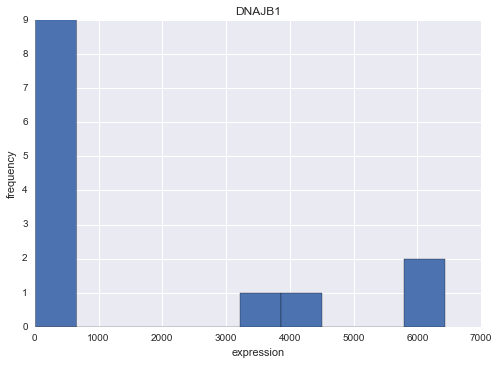

In [127]:
matching[T_cell_cols].iloc[0].hist()
plt.title(matching[T_cell_cols].iloc[0].name)
plt.xlabel('expression')
plt.ylabel('frequency')
matching[T_cell_cols].iloc[0].std()

In [128]:
stds = matching[T_cell_cols].apply(lambda row: row.std(), axis=1)

In [129]:
stds

geneid
DNAJB1      2520.768730
DNAJB1      2520.662964
SRSF7        721.295003
SRSF7        722.256668
SRSF7        720.163413
SRSF7        719.946360
ZFP36L2     1750.488020
ZFP36L2     1749.180240
ZFP36L2     1749.945657
VAMP2        602.831878
VAMP2        602.016124
VAMP2        602.963962
PPP1R2      1015.061387
PPP1R2      1015.008809
PPP1R2      1016.622226
TBCC         874.372446
LEPROTL1    1811.144919
LEPROTL1    1810.387813
CAMLG       1130.129785
KLF9         271.328881
KLF9         269.900660
KLF9         270.847198
GADD45A      839.089479
TMC6         919.208226
TMC6         919.720222
CD8A        4843.671682
ZNF91       1499.797130
PF4           77.285939
THUMPD1      730.474714
THUMPD1      731.020986
FLT3LG       620.138353
FLT3LG       620.424713
TSC22D3     2629.671979
TSC22D3     2628.103622
SLC16A7      218.492031
SLC16A7      219.203399
GZMM         602.228014
CD8B        1808.319713
CD8B        1808.894992
SF1         1025.830564
SF1         1026.858317
RBM3     

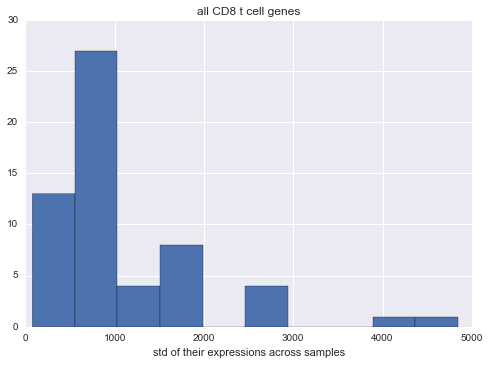

In [130]:
stds.hist()
plt.title("all CD8 t cell genes")
plt.xlabel('std of their expressions across samples')

### are the columns/arrays normalized?

no! are the last few not log transformed?

In [132]:
matching[T_cell_cols].apply(lambda x: x.mean(), axis=0)

Tcell | CD8 | 0         8.287731
Tcell | CD8 | 1         8.384672
Tcell | CD8 | 2         8.230893
Tcell | CD8 | 3         8.308240
Tcell | CD8 | 4         8.350188
CD8Tcell | N0 | 1       9.418571
CD8Tcell | N0 | 2       9.002294
CD8Tcell | N0 | 3       9.015552
CD8Tcell | N0 | 4       9.117555
T cells CD8_1        2548.823653
T cells CD8_2        1916.269461
T cells CD8_3        2022.507251
T cells CD8_4        2198.566624
dtype: float64

In [133]:
np.log2(2548)

11.3151495622563

### larger population: all types of T cells

In [119]:
# isolate only the T cells
T_cell_cols = matching.columns[matching.columns.str.replace('Tcell', 'T cell').str.contains('T cell')]
T_cell_cols

Index([u'Tcell 1', u'Tcell 2', u'Tcell 3', u'Tcell | CD8 | 0',
       u'Tcell | CD8 | 1', u'Tcell | CD8 | 2', u'Tcell | CD8 | 3',
       u'Tcell | CD8 | 4', u'Tcell | Th1 | 0', u'Tcell | Th2 | 0',
       u'Tcell | Th1 | 1', u'Tcell | Th2 | 1', u'CD8Tcell | N0 | 1',
       u'CD8Tcell | N0 | 2', u'CD8Tcell | N0 | 3', u'CD8Tcell | N0 | 4',
       u'CD4Tcell | N0 | 1', u'CD4Tcell | N0 | 2', u'CD4Tcell | N0 | 3',
       u'CD4Tcell | Th1-restimulated12hour | 1',
       u'CD4Tcell | Th1-restimulated12hour | 2',
       u'CD4Tcell | Th1-restimulated48hour | 1',
       u'CD4Tcell | Th1-restimulated48hour | 2',
       u'CD4Tcell | Th1-restimulated48hour | 3',
       u'CD4Tcell | Th2-restimulated12hour | 1',
       u'CD4Tcell | Th2-restimulated12hour | 2',
       u'CD4Tcell | Th2-restimulated12hour | 3',
       u'CD4Tcell | Th2-restimulated48hour | 1',
       u'CD4Tcell | Th2-restimulated48hour | 2',
       u'CD4Tcell | Th2-restimulated48hour | 3',
       u'MemoryTcell | RO-unactivated | 1',
     